In [5]:
from keras.utils import normalize, to_categorical
from unet_model import multi_unet_model
from unet512 import unet
import os
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define constants
SIZE_X = 256  # Image width
SIZE_Y = 256  # Image height
n_classes = 2  # Number of classes for segmentation
BATCH_SIZE = 8  # Batch size for training

# Define a generator for lazy loading of data
def data_generator(image_paths, mask_paths, batch_size, n_classes, normalize_images=True):
    """
    Generates batches of images and masks lazily.

    Args:
        image_paths (list): List of paths to the training images.
        mask_paths (list): List of paths to the corresponding masks.
        batch_size (int): Number of samples per batch.
        n_classes (int): Number of segmentation classes.
        normalize_images (bool): Whether to normalize images to [0, 1].

    Yields:
        Tuple (images, masks_cat): A batch of images and their one-hot encoded masks.
    """
    while True:  # Infinite loop to provide data indefinitely
        for i in range(0, len(image_paths), batch_size):
            batch_image_paths = image_paths[i:i + batch_size]
            batch_mask_paths = mask_paths[i:i + batch_size]
            
            # Load images and masks for the current batch
            images = []
            masks = []
            for img_path, mask_path in zip(batch_image_paths, batch_mask_paths):
                img = cv2.imread(img_path, 0)  # Read image as grayscale
                mask = cv2.imread(mask_path, 0)  # Read mask as grayscale
                img = cv2.resize(img, (SIZE_X, SIZE_Y))
                mask = cv2.resize(mask, (SIZE_X, SIZE_Y))

                # if normalize_images:
                #     img = img / 255.0  # Normalize image to range [0, 1]

                # Resize to ensure consistent dimensions
                # img = cv2.resize(img, (SIZE_X, SIZE_Y))
                # mask = cv2.resize(mask, (SIZE_X, SIZE_Y))

                img = normalize(img, axis=1)
                images.append(img)
                masks.append(mask)

            # Convert to NumPy arrays
            images = np.expand_dims(np.array(images), axis=3)  # Add channel dimension
            masks = np.array(masks)

            # Convert masks to categorical (one-hot encoding)
            masks_cat = np.array([to_categorical(m, num_classes=n_classes) for m in masks])

            yield images, masks_cat  # Yield a batch

# Paths to training images and masks
train_image_paths = glob.glob("/home/abdulrauf/Projects/MakhiMeter-Training/data/brain/rgb aug/*.png")
train_mask_paths = glob.glob("/home/abdulrauf/Projects/MakhiMeter-Training/data/brain/labeled encoded/*.png")

# Split data into training and testing sets
train_image_paths, test_image_paths, train_mask_paths, test_mask_paths = train_test_split(
    train_image_paths, train_mask_paths, test_size=0.1, random_state=0
)





In [2]:
# Create data generators
train_gen = data_generator(train_image_paths, train_mask_paths, BATCH_SIZE, n_classes)
val_gen = data_generator(test_image_paths, test_mask_paths, BATCH_SIZE, n_classes)

# Define the model


In [ ]:
IMG_HEIGHT = SIZE_Y
IMG_WIDTH = SIZE_X
IMG_CHANNELS = 1  # Grayscale images

def get_model2():
    return unet(n_class=8, input_size=(256, 256, 1))

def get_model():
    return multi_unet_model(n_classes=2, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1)

# model = get_model()

model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



I0000 00:00:1735197461.461435  100442 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735197461.492604  100442 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735197461.493586  100442 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735197461.499755  100442 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,940,834 (7.40 MB)

 Trainable params: 1,940,834 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#Fine Tuning
from tensorflow.keras.models import load_model
model = load_model('models/version 1.1/unet_256_bg_removed_9600_checkpoint_epoch-19_val_loss-0.1870.keras')

for layer in model.layers[:16]:  # Assuming first 20 layers form the encoder
    layer.trainable = False

# Unfreeze decoder (upsampling path) layers
for layer in model.layers[16:]:
    layer.trainable = True

from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint callback to monitor val_loss
checkpoint_callback = ModelCheckpoint(
    'models/version 1.3/checkpoint/unet_256_bg_removed_finetuned_checkpoint_epoch-{epoch:02d}_val_loss-{val_loss:.4f}.keras',
    monitor='val_loss',  # Monitor validation loss for segmentation
    save_best_only=True,  # Save the best model only
    save_weights_only=False,
    mode='min',  # We want to minimize validation loss
    verbose=1
)
# Fine-tune the model with frozen encoder layers
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_image_paths) // BATCH_SIZE,
    validation_data=val_gen,
    validation_steps=len(test_image_paths) // BATCH_SIZE,
    epochs=15,
    verbose=1,
    shuffle=False,
    callbacks=[checkpoint_callback]
)

# Save the fine-tuned model
model.save('models/version 1.1/unet_256_bg_removed_9600_15epochs_finetuned.h5')




Epoch 1/15


I0000 00:00:1735083215.248472    6352 service.cc:146] XLA service 0x7e26ec01df90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735083215.248501    6352 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2024-12-25 04:33:35.412502: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-25 04:33:36.315456: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-12-25 04:33:57.858896: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_8', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Regi

432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9011 - loss: 0.3675
Epoch 1: val_loss improved from inf to 0.26253, saving model to models/version 1.3/checkpoint/unet_256_bg_removed_finetuned_checkpoint_epoch-01_val_loss-0.2625.keras
432/432 ━━━━━━━━━━━━━━━━━━━━ 94s 157ms/step - accuracy: 0.9012 - loss: 0.3674 - val_accuracy: 0.9320 - val_loss: 0.2625
Epoch 2/15
  1/432 ━━━━━━━━━━━━━━━━━━━━ 1:43:44 14s/step - accuracy: 0.9624 - loss: 0.1266

2024-12-25 04:35:20.296846: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_8', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_6', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_7', 4 bytes spill stores, 12 bytes spill loads



432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9270 - loss: 0.2842
Epoch 2: val_loss improved from 0.26253 to 0.24361, saving model to models/version 1.3/checkpoint/unet_256_bg_removed_finetuned_checkpoint_epoch-02_val_loss-0.2436.keras
432/432 ━━━━━━━━━━━━━━━━━━━━ 95s 187ms/step - accuracy: 0.9270 - loss: 0.2842 - val_accuracy: 0.9375 - val_loss: 0.2436
Epoch 3/15
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9309 - loss: 0.2717
Epoch 3: val_loss improved from 0.24361 to 0.23419, saving model to models/version 1.3/checkpoint/unet_256_bg_removed_finetuned_checkpoint_epoch-03_val_loss-0.2342.keras
432/432 ━━━━━━━━━━━━━━━━━━━━ 85s 196ms/step - accuracy: 0.9309 - loss: 0.2717 - val_accuracy: 0.9400 - val_loss: 0.2342
Epoch 4/15
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9334 - loss: 0.2626
Epoch 4: val_loss improved from 0.23419 to 0.23371, saving model to models/version 1.3/checkpoint/unet_256_bg_removed_finetuned_checkpoint_epoch-04_val_loss-0.2337.ker

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint callback
# checkpoint_callback = ModelCheckpoint(
#     'models/version 1.3/checkpoint/unet_256_bg_removed_13000_checkpoint_epoch-{epoch:02d}_val_loss-{val_loss:.4f}.keras',  # File path format
#     monitor='val_accuracy',  # Metric to monitor (you can also use 'val_accuracy')
#     save_best_only=True,  # Only save the model if the validation loss improves
#     save_weights_only=False,  # Save the entire model (set to True to save only weights)
#     mode='max',  # 'min' means the model is saved when the monitored metric is minimized (e.g., loss)
#     verbose=1  # Show a message when the model is saved
# )


# Train the model using the generators
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_image_paths) // BATCH_SIZE,
    validation_data=val_gen,
    validation_steps=len(test_image_paths) // BATCH_SIZE,
    epochs=20,
    verbose=1,
    shuffle=False,
    # callbacks=[checkpoint_callback]
)

# Save the model
model.save('models/brain/unet_256_bg_removed_80_20epochs.h5')

Epoch 1/20


/home/abdulrauf/Projects/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(
I0000 00:00:1735182212.491908   80856 service.cc:146] XLA service 0x7dbc2400be30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735182212.491947   80856 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2024-12-26 08:03:32.783572: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-26 08:03:33.984975: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-12-26 08:03:56.749001: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled 

9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5064 - loss: 0.6688 - val_accuracy: 0.9966 - val_loss: 0.0539
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9970 - loss: 0.1386 - val_accuracy: 0.9966 - val_loss: 0.0891
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9970 - loss: 0.0468 - val_accuracy: 0.9966 - val_loss: 0.0407
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.9970 - loss: 0.0267 - val_accuracy: 0.9966 - val_loss: 0.0319
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.9970 - loss: 0.0222 - val_accuracy: 0.9966 - val_loss: 0.0314
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.9970 - loss: 0.0211 - val_accuracy: 0.9966 - val_loss: 0.0273
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.9970 - loss: 0.0206 - val_accuracy: 0.9966 - val_loss: 0.0261
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9970 - loss: 0.0201 - val_accuracy: 0.9966 - val_loss: 0.0258
Epoch

In [5]:
model.save('models/unet512_256__6900_5epochs.h5')

(256, 256, 1)
(1, 256, 256, 1)


/home/abdulrauf/Projects/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_123']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


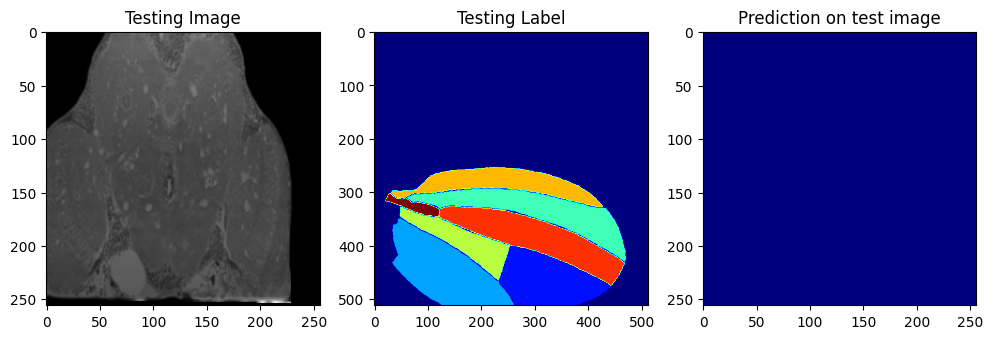

In [6]:

def get_model():
    return multi_unet_model(n_classes=2, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1)
model = get_model()

import matplotlib.pyplot as plt

model.load_weights('/home/abdulrauf/Projects/MakhiMeter-Training/models/brain/unet_256_bg_removed_80_20epochs.h5')  
import random
# print(X_test)
# test_img_number = random.randint(0, len(X_test))
# test_img = X_test[test_img_number]
test_img = cv2.imread('/home/abdulrauf/Projects/MakhiMeter-Training/data/brain/rgb aug/aug_0_bottom_left_bg_removed.png', 0)
test_img = np.array(test_img)
test_img = normalize(test_img, axis=1)
test_img = np.expand_dims(test_img, axis=-1)
test_img_input = np.expand_dims(test_img, axis=-1)
print(test_img.shape)
ground_truth=cv2.imread('/home/abdulrauf/Projects/MakhiMeter-Training/data/training/model_v1.2/experiment_2/with_rotation/size 512/labeled encoded/rot_90_aug_0_D.annulipes_f_01.png', 0)
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]
predicted_img

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:, 0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth, cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()